# Proyecto 2

**Tema:** Predicción de enfermedades Cardíacas


|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Modelo - Aprendizaje de Estructura - Restricciones

## Librerías Requeridas

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.readwrite import BIFWriter

## Carga de Datos

In [2]:
df = pd.read_csv("../../../Data/Transformed/Discrete.csv")

## Estimación Estructura

In [3]:
est = PC(data=df)
estimated_model = est.estimate(variant="stable", max_cond_vars=10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
print(estimated_model)
print(estimated_model.nodes())
print(estimated_model.edges())

DAG with 10 nodes and 8 edges
['age', 'ca', 'heartdis', 'sex', 'thal', 'slope', 'thalach', 'cp', 'exang', 'oldpeak']
[('age', 'ca'), ('heartdis', 'ca'), ('heartdis', 'thal'), ('thal', 'sex'), ('slope', 'oldpeak'), ('thalach', 'slope'), ('cp', 'heartdis'), ('exang', 'cp')]


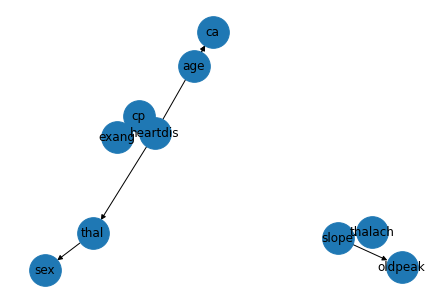

In [5]:
nodes = list(estimated_model.nodes())
edges = list(estimated_model.edges())

# Create Graph
G = nx.DiGraph()

# Add Nodes
for node in nodes:
    G.add_node(node)
    
# Add Edges
for edge in edges:
    G.add_edge(edge[0], edge[1])
    
# Draw Graph
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=1000, arrows=True)
plt.show()

## Red Bayesiana

In [6]:
model = BayesianNetwork(estimated_model)
model.fit(data=df, estimator=MaximumLikelihoodEstimator)

In [7]:
for i in model.nodes():
    print(model.get_cpds(i))

+--------+----------+
| age(1) | 0.247525 |
+--------+----------+
| age(2) | 0.250825 |
+--------+----------+
| age(3) | 0.240924 |
+--------+----------+
| age(4) | 0.260726 |
+--------+----------+
+----------+----------------------+-----+---------------------+
| age      | age(1)               | ... | age(4)              |
+----------+----------------------+-----+---------------------+
| heartdis | heartdis(0)          | ... | heartdis(1)         |
+----------+----------------------+-----+---------------------+
| ca(0)    | 0.9259259259259259   | ... | 0.22727272727272727 |
+----------+----------------------+-----+---------------------+
| ca(1)    | 0.05555555555555555  | ... | 0.2727272727272727  |
+----------+----------------------+-----+---------------------+
| ca(2)    | 0.018518518518518517 | ... | 0.2727272727272727  |
+----------+----------------------+-----+---------------------+
| ca(3)    | 0.0                  | ... | 0.22727272727272727 |
+----------+----------------------

## Guardar Modelo

In [9]:
writer = BIFWriter(model)
writer.write_bif('../../../Data/Models/Estructura_Restricciones.bif')